In [1]:
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import CISA
import seaborn as sns

In [41]:
cellmask = np.array(Image.open('eg_data/masks/cellmask.tiff'))
boundmask = np.array(Image.open('eg_data/masks/boundmask.tiff'))
markers =  ['CD3','CD4','CD8a','CD20','CD68','DNA1','Ki67','S100']
img_dict = {}
for m in markers:
    img_dict[m] = np.array(Image.open(f'eg_data/images/{m}.tiff'))
cell_df = pd.read_csv('eg_data/cell_df.csv')
cell_df

,Cell_ID,Cell_type,Area,X,Y,CD3,CD4,CD8a,CD68,DNA1,Ki67,S100
0,1,Th,64.0,4.062500,515.390625,0.896316,0.717363,0.217706,0.157511,0.949688,0.733099,0.053448
1,2,Th,62.0,5.129032,339.967742,0.509592,0.461886,0.327034,0.290222,0.884536,0.164290,0.022604
2,3,B,37.0,3.702703,473.135135,0.262187,0.356334,0.299218,0.142044,0.975723,0.119582,0.098124
3,4,B,12.0,2.500000,478.500000,0.236689,0.129795,0.478217,0.138749,0.995900,0.274432,0.056858
4,5,Th,68.0,7.602941,290.720588,0.652914,0.660936,0.179947,0.193262,0.936892,0.269599,0.092633
...,...,...,...,...,...,...,...,...,...,...,...,...
9587,9588,B,38.0,1040.000000,613.289474,0.167278,0.176728,0.072697,0.221628,0.961809,0.095217,0.171493
9588,9589,other,31.0,1040.709677,310.870968,0.032793,0.041924,0.105760,0.215441,0.585882,0.270726,0.000000
9589,9590,Mphi,37.0,1040.837838,484.297297,0.205483,0.420096,0.126478,0.128736,0.865962,0.112346,0.081378
9590,9591,Mphi,22.0,1040.318182,650.954545,0.060268,0.417395,0.095696,0.643866,0.882776,0.120561,0.046886


In [42]:
cell_df.Cell_type.value_counts()

B        3341
Th       2173
Mphi     1625
other    1525
Tc        602
Mel       273
Neut       53
Name: Cell_type, dtype: int64

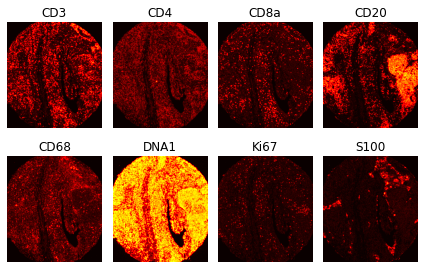

In [43]:
# plt.figure(figsize=(9,4))
for i, m in enumerate(markers):
    plt.subplot(2,4,i+1)
    plt.imshow(np.log(1+img_dict[m]), cmap = 'hot')
    plt.axis('off')
    plt.title(m)
plt.tight_layout()

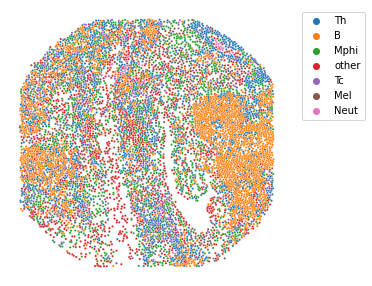

In [31]:
plt.figure(figsize = (5,5))
sns.scatterplot(
    data = cell_df,
    y = 'X',
    x = 'Y',
    hue = 'Cell_type',
    s = 5
)
plt.ylim(plt.ylim()[::-1])
plt.axis('off')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Cell types')

In [5]:
CISA_df = CISA.CISA(
    img_dict = {m:img_dict[m] for m in ['CD3','CD4','CD8a', 'S100']}, 
    cell_df = cell_df, 
    cellmask = cellmask, 
    boundmask = boundmask, 
    neighbor_classes = ['B','Mphi','Mel'], 
    expressing_markers = ['CD3','CD4','CD8a'], 
    cell_list = None, 
    target_classes = ['Th','Tc'], 
    n_bootstraps = 1000, 
    e_width = 2, 
    bound_width = 0, 
    dropna = True, 
    class_col = 'Cell_type', 
    cell_id_col = 'Cell_ID', 
    keep_cols = ['Ki67'], 
    excluded = ['Th','Tc']
)

In [6]:
CISA_df

,Cell,Class,Neighbor,Neighbor_Class,area_c,area_nc,Ki67,CD3_c,CD4_c,CD8a_c,...,CD8a_sigma,S100_sigma,CD3_z,CD4_z,CD8a_z,S100_z,CD3_p,CD4_p,CD8a_p,S100_p
0,5,Th,22,B,5,17,0.269599,3.2,4.800000,0.600000,...,1.161444,0.736886,0.504021,0.289872,-0.371763,2.233161,0.307123,0.385957,0.355035,0.012769
1,6,Th,51,Mphi,6,20,0.150557,0.5,1.000000,0.333333,...,1.804271,1.066451,-0.794841,-0.699810,0.807434,-0.236792,0.213353,0.242023,0.209708,0.406409
2,9,Th,43,Mphi,2,11,0.176609,3.5,10.000000,2.000000,...,1.067149,0.791625,-0.467275,0.625727,2.964731,-0.174303,0.320151,0.265747,0.001515,0.430814
3,10,Th,36,Mphi,5,14,0.863519,3.4,7.600000,0.200000,...,1.654449,0.936275,0.034715,0.662968,-1.981046,-1.791165,0.486154,0.253675,0.023793,0.036633
4,10,Th,47,Mphi,4,14,0.863519,4.0,7.500000,1.250000,...,1.728900,0.924454,0.180036,0.557145,-0.377297,-1.511312,0.428562,0.288714,0.352976,0.065354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,9570,Tc,9583,Mphi,3,14,0.153178,4.0,2.333333,1.666667,...,1.476127,1.185950,0.987738,2.098559,0.415462,2.391305,0.161641,0.017928,0.338902,0.008394
2865,9579,Th,9554,Mphi,4,10,0.157164,2.5,3.000000,0.500000,...,1.163728,0.829495,-0.297977,-0.620043,0.608080,-1.590692,0.382860,0.267615,0.271567,0.055839
2866,9581,Th,9561,B,3,6,0.192710,8.0,4.333333,0.000000,...,0.826752,0.841482,0.631072,0.051960,-0.204164,1.750374,0.263997,0.479280,0.419113,0.040027
2867,9581,Th,9568,B,5,6,0.192710,5.0,4.400000,0.000000,...,0.943534,0.939487,0.242295,0.080768,0.081381,1.734641,0.404276,0.467813,0.467569,0.041402


In [21]:
# Correlation between CD3 and CD4 synapse strength is higher in helper T cells:
CISA_df.groupby('Class')[['CD3_CISA']].corrwith(CISA_df['CD4_CISA'])

,CD3_CISA
Class,
Tc,0.177311
Th,0.534078


In [22]:
# Correlation between CD3 and CD8a synapse strength is higher in cytotoxic T cells:
CISA_df.groupby('Class')[['CD3_CISA']].corrwith(CISA_df['CD8a_CISA'])

,CD3_CISA
Class,
Tc,0.549544
Th,0.130530
